# HR Analytics Case Study Solution

## Problem Definition
Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

----------------------------------------------------------------------------------------------------------------------------
## Problem Statement
A Company named XYZ has a problem of attrition .The rate of attrition has been quite high so
being the head analyst of the company the repost on all the employees has been provided to
you and you need to find out the reason of attrition so the company can reduce the attrition.

### Importing Python libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import pearsonr
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

### Importing the data

In [4]:
#to import the dataset into the notebook

ds = pd.read_csv("general_data.csv")
ds.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


>The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

>Also we can see that there some columns which dont not add any value to the process. we shall be droping them later down.

In [6]:
# The list of columns in the dataset 
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Data Treatment

In [17]:
# ds.isnull()
# ds.duplicated()

In [18]:
ds = ds.dropna()

In [19]:
ds = ds.drop_duplicates()

In [20]:
ds.info()
# we see that there are no null values in the dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

# Univariate Analysis

In [65]:
# Make a copy of the original sourcefile
ds2 = ds.copy()

In [66]:
# To drop the columns which are not of any signifigance anymore
ds2 = ds2.drop([ 'EmployeeCount', 'EmployeeID', 'StandardHours', 'Over18'], axis=1)

In [67]:
ds2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [68]:
ds2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [69]:
le = preprocessing.LabelEncoder()

In [70]:
ds2['Attrition'] = le.fit_transform(ds2['Attrition'])
ds2['BusinessTravel'] = le.fit_transform(ds2['BusinessTravel'])
ds2['MaritalStatus'] = le.fit_transform(ds2['MaritalStatus'])
ds2['Department'] = le.fit_transform(ds2['Department'])
ds2['EducationField'] = le.fit_transform(ds2['EducationField'])
ds2['Gender'] = le.fit_transform(ds2['Gender'])
ds2['JobRole'] = le.fit_transform(ds2['JobRole'])

In [71]:
# to display the newly modified coluumns 
ds2[['Attrition','BusinessTravel','MaritalStatus','Department','EducationField','Gender','JobRole']].head()

,Attrition,BusinessTravel,MaritalStatus,Department,EducationField,Gender,JobRole
0,0,2,1,2,1,0,0
1,1,1,2,1,1,0,6
2,0,1,1,1,4,1,7
3,0,0,1,1,1,1,1
4,0,2,2,1,3,1,7


In [72]:
# stats summary for full dataset
ds2.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,0.160885,1.607257,1.260840,9.198996,2.912369,2.247147,0.599270,2.063898,4.459836,1.099270,65061.702419,2.693291,15.210634,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,0.367467,0.665635,0.527461,8.105396,1.024728,1.329810,0.490102,1.106115,2.461038,0.729559,47142.310175,2.497832,3.663007,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.000000,2.000000,5.000000,1.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.000000,3.000000,7.000000,2.000000,83790.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.000000,5.000000,8.000000,2.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


#### Note: In column Attrition 

>no  = 0

>yes = 1

In [73]:
# grouping the dataset by Yes or No for Attrition
ds3 = ds2.groupby('Attrition')

In [128]:
# we get mean of all columns or both attrition = no and yes 
ds3.mean()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,
0,37.567038,1.607017,1.271145,9.232527,2.920044,2.280392,0.595322,2.069894,4.431058,1.048137,65684.209954,2.646451,15.157465,0.797661,11.868643,2.825129,7.367419,2.236062,4.367963
1,33.628369,1.608511,1.207092,9.024113,2.872340,2.073759,0.619858,2.032624,4.609929,1.365957,61814.950355,2.937589,15.487943,0.778723,8.273759,2.658156,5.148936,1.960284,2.865248


Similarly we can check the other stats 

In [129]:
# Cheking the mean, median, variance, skewness for grouped dataset
# and checking mode, Kurt for ungrouped dataset
df = [ds3.mean().transpose(), ds3.median().transpose(), 
      ds2.mode().transpose(),ds3.var().transpose(), 
      ds3.skew().transpose(), ds2.kurt().transpose()]

In [130]:
pd.concat( df, axis=1, keys=['Mean()', 'Median()', 'Mode()','Var()','Skew()','Kurt()'])

Mean()               Median()           \
Attrition                           0             1        0        1   
Age                         37.567038     33.628369     36.0     32.0   
BusinessTravel               1.607017      1.608511      2.0      2.0   
Department                   1.271145      1.207092      1.0      1.0   
DistanceFromHome             9.232527      9.024113      7.0      7.0   
Education                    2.920044      2.872340      3.0      3.0   
EducationField               2.280392      2.073759      2.0      2.0   
Gender                       0.595322      0.619858      1.0      1.0   
JobLevel                     2.069894      2.032624      2.0      2.0   
JobRole                      4.431058      4.609929      5.0      6.0   
MaritalStatus                1.048137      1.365957      1.0      2.0   
MonthlyIncome            65684.209954  61814.950355  49300.0  49080.0   
NumCompaniesWorked           2.646451      2.937589      2.0      1.0   
PercentSalaryHike           15.157465     15.487943     14.0     14.0   
StockOptionLevel             0.797661      0.778723      1.0      1.0   
TotalWorkingYears           11.868643      8.273759     10.0      7.0   
TrainingTimesLastYear        2.825129      2.658156      3.0      3.0   
YearsAtCompany               7.367419      5.148936      6.0      3.0   
YearsSinceLastPromotion      2.236062      1.960284      1.0      1.0   
YearsWithCurrManager         4.367963      2.865248      3.0      2.0   
Attrition                         NaN           NaN      NaN      NaN   

                          Mode()         Var()                  Skew()  \
Attrition                      0             0             1         0   
Age                         35.0  7.906440e+01  9.367988e+01  0.406885   
BusinessTravel               2.0  4.627690e-01  3.408366e-01 -1.459686   
Department                   1.0  2.694963e-01  3.206883e-01  0.229290   
DistanceFromHome             2.0  6.677209e+01  6.014288e+01  0.953779   
Education                    3.0  1.053997e+00  1.029134e+00 -0.303039   
EducationField               1.0  1.781805e+00  1.665006e+00  0.545219   
Gender                       1.0  2.409792e-01  2.359687e-01 -0.388571   
JobLevel                     1.0  1.247290e+00  1.099786e+00  1.014550   
JobRole                      7.0  6.094606e+00  5.840526e+00 -0.334043   
MaritalStatus                1.0  5.202611e-01  5.107713e-01 -0.072237   
MonthlyIncome            23420.0  2.260283e+09  2.015153e+09  1.337715   
NumCompaniesWorked           1.0  6.045263e+00  7.189281e+00  1.060904   
PercentSalaryHike           11.0  1.322846e+01  1.433260e+01  0.830327   
StockOptionLevel             0.0  7.250979e-01  7.350580e-01  0.970007   
TotalWorkingYears           10.0  6.029912e+01  5.150592e+01  1.065443   
TrainingTimesLastYear        2.0  1.721044e+00  1.336102e+00  0.556424   
YearsAtCompany               5.0  3.717699e+01  3.553318e+01  1.658986   
YearsSinceLastPromotion      0.0  1.047364e+01  9.970011e+00  1.944890   
YearsWithCurrManager         2.0  1.292686e+01  9.900850e+00  0.803398   
Attrition                    0.0           NaN           NaN       NaN   

                                     Kurt()  
Attrition                       1         0  
Age                      0.714479 -0.409517  
BusinessTravel          -1.201873  0.695632  
Department              -0.004108 -0.394980  
DistanceFromHome         0.957983 -0.230691  
Education               -0.217029 -0.565008  
EducationField           0.570440 -0.687173  
Gender                  -0.494885 -1.836584  
JobLevel                 1.053776  0.388189  
JobRole                 -0.484378 -1.194397  
MaritalStatus           -0.668578 -1.112941  
MonthlyIncome            1.536183  0.990836  
NumCompaniesWorked       0.864889  0.014307  
PercentSalaryHike        0.760011 -0.306951  
StockOptionLevel         0.956491  0.356755  
TotalWorkingYears        1.674396  0.909316  
TrainingTimes

#### Interesting obeservations from the above table
The column with _**'0'**_ represents _**NO**_ for Attrition

The column with _**'1'**_ represents _**YES**_ for Attrition

1. The average Age of current employees is _**37.5**_ 
   
   The average Age of ex - employees is _**33.6**_


2. The average YearsAtCompany of current employees is _**7.3**_
   
   The average YearsAtCompany of ex - employees is _**5.1**_


3. The average YearsSinceLastPromotion of current employees is _**2.2**_
   
   The average YearsSinceLastPromotion of ex - employees is _**1.96**_
 
 
4. The average YearsWithCurrManager of current employees is _**4.3**_
   
   The average YearsWithCurrManager of ex - employees is _**2.8**_
   
   
5. The average MaritalStatus of current employees is _**1.04**_
   
   The average MaritalStatus of ex - employees is _**1.36**_
   
   
6. The average PercentSalaryHike of current employees is _**15.1**_
   
   The average PercentSalaryHike of ex - employees is _**15.4**_
    
#### These observations can considered as H0 and H1 statements for testing 

### The same observations can be seen in the below histographs 
- The 1st set of graphs are for Attrition = _**NO**_
- The 2nd set of graphs are for Attrition = _**YES**_

#### Ploting the histograph for grouped dataset

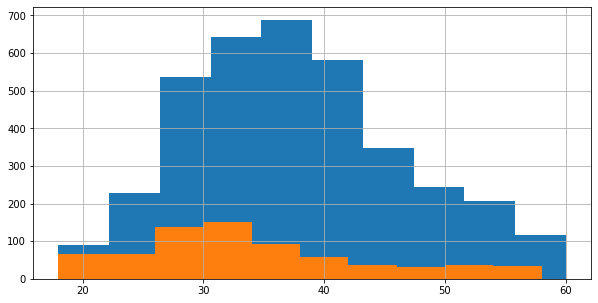

In [136]:
ds3.Age.hist(figsize=(10,5))
plt.show()

> As we can observe the mean age of employees who leave the company is around 33(orange) and those who stay is around 37(blue) as we have already seen in the above table

#### Likewise we can plot a similar graph for other columns 

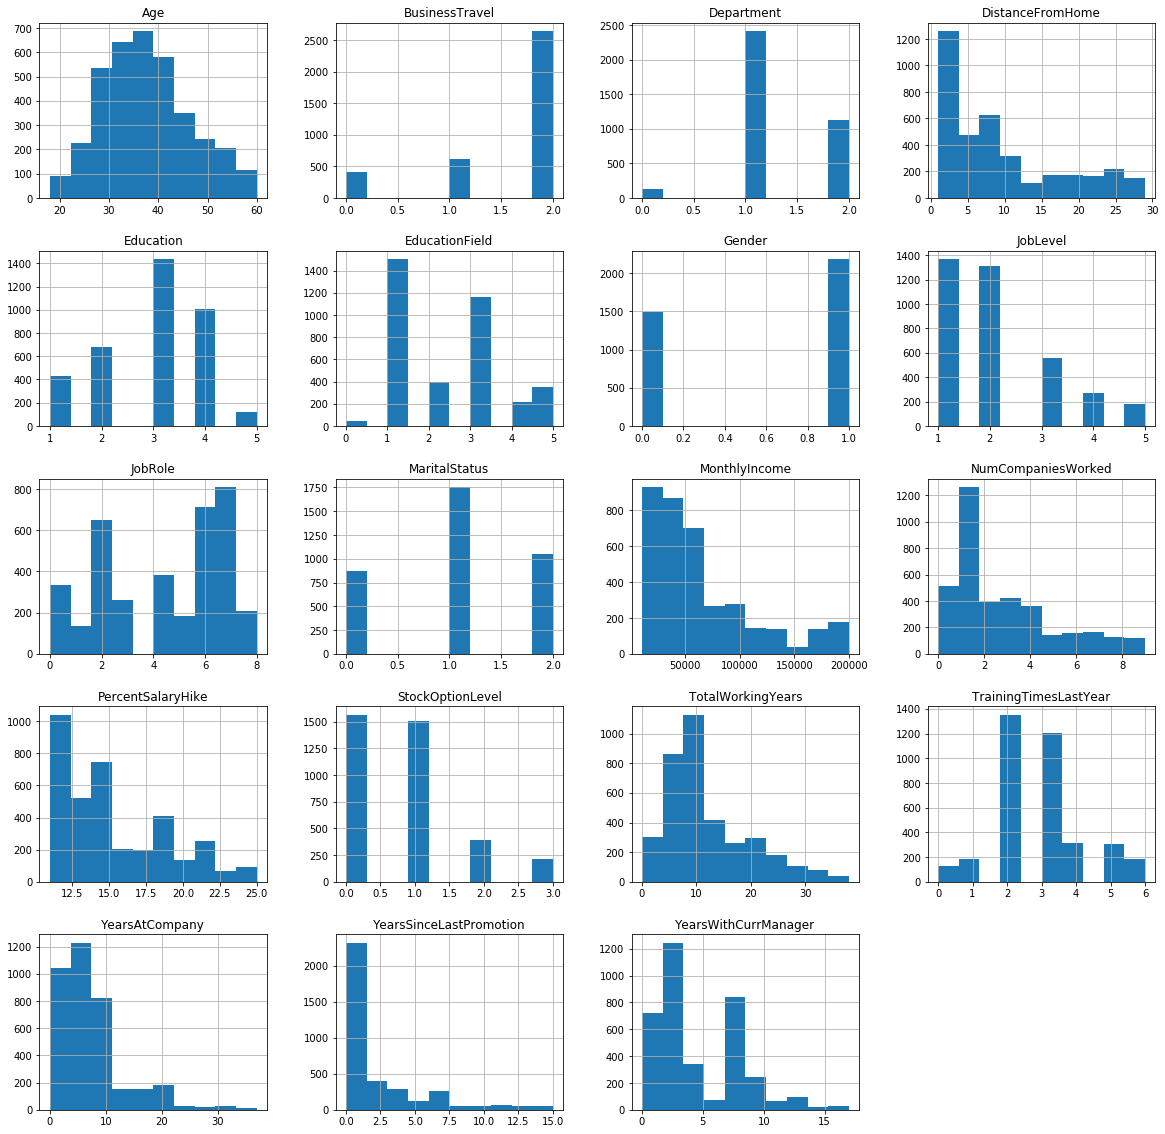

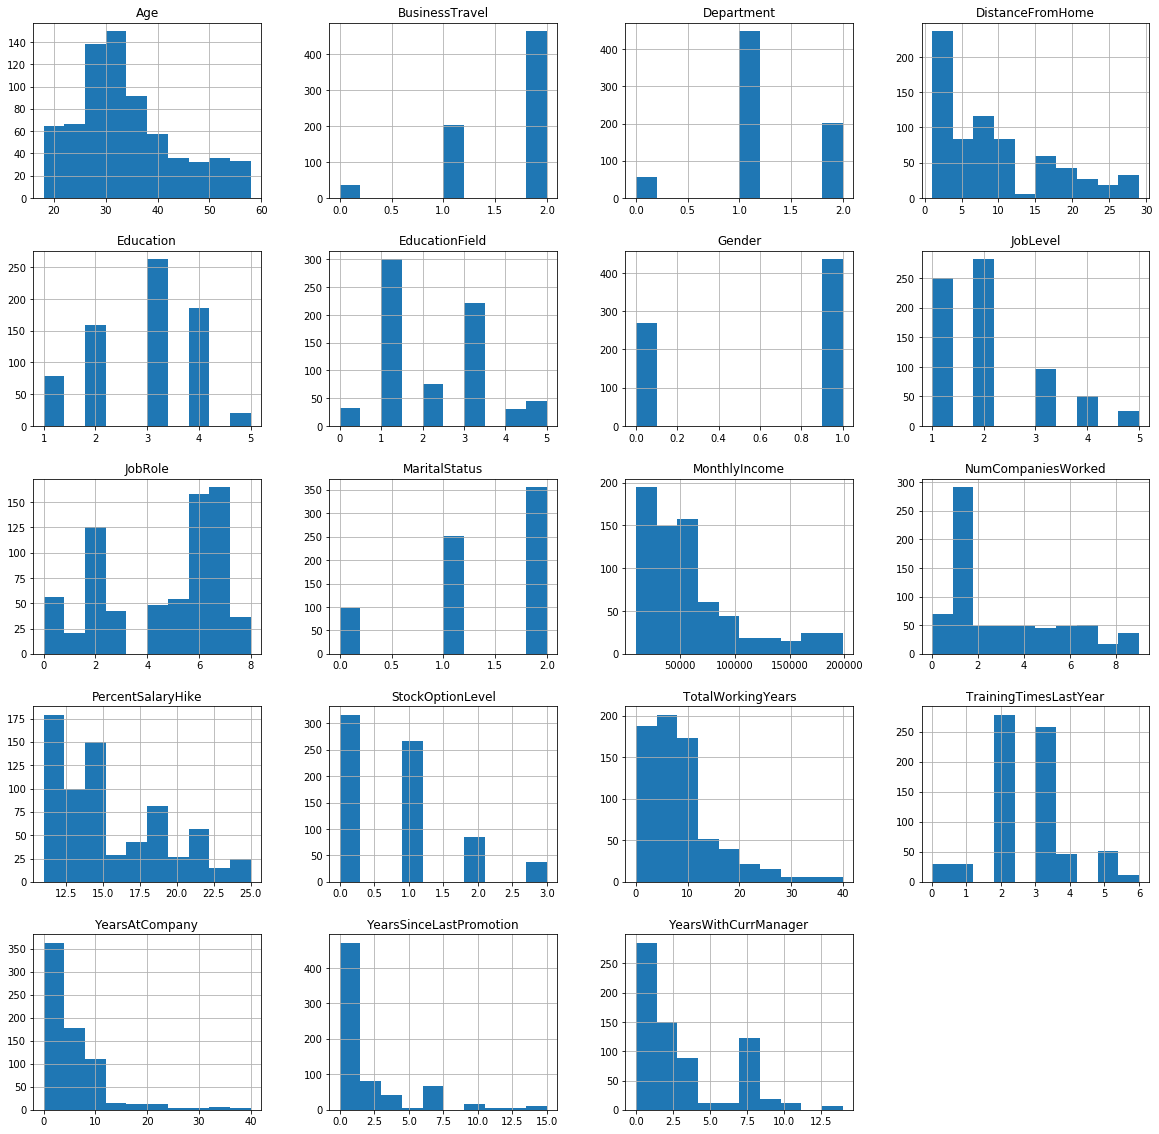

In [121]:
ds3.hist(figsize=(20,20))
plt.show()

### Ploting the heatmap 

In [163]:
# Calculate correlations
corr = ds2.corr()
#print(corr)
# to create a zero matrix of size/shape corr
heatmap_mask = np.zeros_like(corr)

# Return the indices for the upper-triangle and mae them eual to 1
heatmap_mask[np.triu_indices_from(heatmap_mask)] = True
#print(heatmap_mask)

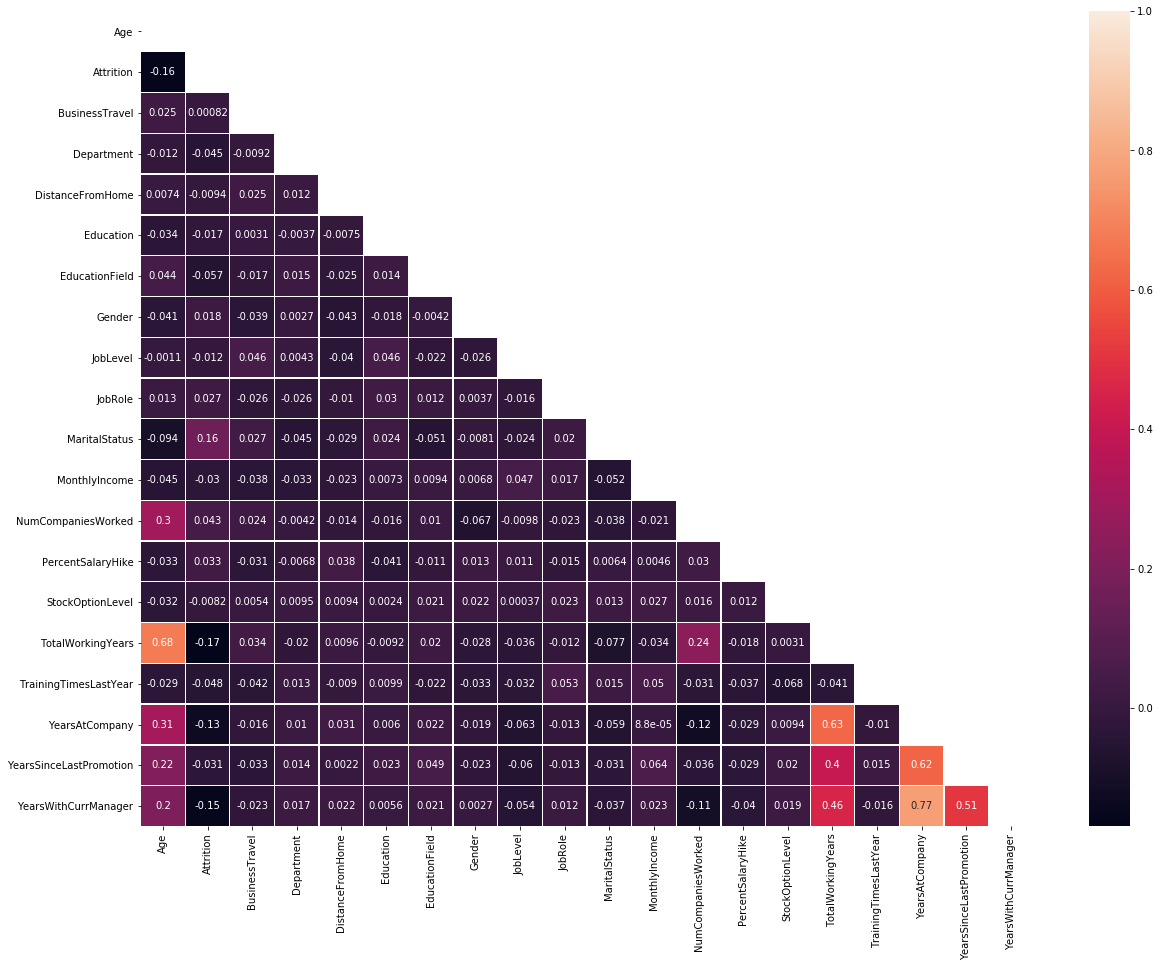

In [165]:
# Heatmap for visualizeing 
# to set the size of the map uusing mathplotlib.pyplot
plt.figure(figsize=(20, 15))
# heatmap parameters used 
# mask -> masks cell which is true(1)
# annot ->  to display values inside each cell
# linewidths -> for spacing bwtn cells 
sns.heatmap(corr,mask=heatmap_mask, annot=True, linewidths=.3)

#### Inference from the above analysis
>  As shown above in heat map, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

## Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8241c3488>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8241c3f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8241a5dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8241c9a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d8241c3dc8>],
 'means': []}

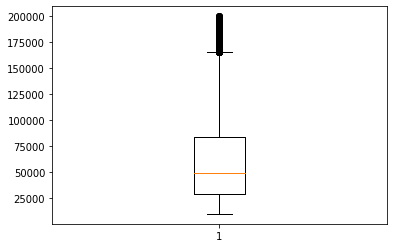

In [173]:
box_plot = ds2.MonthlyIncome
plt.boxplot(box_plot)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8241ebd88>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8241f3408>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8241eb608>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8241f9bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d824196788>],
 'means': []}

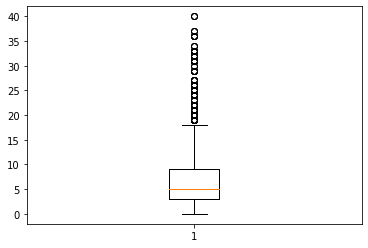

In [175]:
box_plot=ds2.YearsAtCompany
plt.boxplot(box_plot)

#### It can be observed that we have a lot of outliners for MonthlyIncome & YearsAtCompany columns 

## Data Description and Exploratory Visualisations

##  box plots, means, standard deviations, and z-tests to explore the attrition

In [176]:
def display_ttest(data, category, numeric):
    output = {}
    s1 = data[data[category] == data[category].unique()[0]][numeric]
    s2 = data[data[category] == data[category].unique()[1]][numeric]
    from scipy.stats import ttest_ind
    t, p = ttest_ind(s1,s2)
    from IPython.display import display
    from pandas import DataFrame
    display(DataFrame(data=[{"t-test statistic" : t, "p-value" : p}], columns=["t-test statistic", "p-value"], index=[category]).round(2))

def display_ztest(data, category, numeric):
    output = {}
    s1 = data[data[category] == data[category].unique()[0]][numeric]
    s2 = data[data[category] == data[category].unique()[1]][numeric]
    from statsmodels.stats.weightstats import ztest
    z, p = ztest(s1,s2)
    from IPython.display import display
    from pandas import DataFrame
    display(DataFrame(data=[{"z-test statistic" : z, "p-value" : p}], columns=["z-test statistic", "p-value"], index=[category]).round(2))
  

In [206]:
def display_cxn_analysis(data, category, numeric, target):
    
    from seaborn import boxplot, set_style
    from matplotlib.pyplot import show, figure, subplots, ylabel, xlabel, subplot, suptitle
    
    not_target = [a for a in data[category].unique() if a != target][0]
    
    pal = {target : "yellow",
          not_target : "darkgrey"}
    

    set_style("whitegrid")
    figure(figsize=(12,5))
    suptitle(numeric + " by " + category)
 
    
    p1 = subplot(2,2,2)
    boxplot(y=category, x=numeric, data=data, orient="h", palette = pal)
    p1.get_xaxis().set_visible(False)
    
    #display p value
    
    if(data[category].value_counts()[0] > 30 and data[category].value_counts()[1] > 30):
        display_ztest(data,category,numeric)
    else:
        display_ttest(data,category,numeric)
    
    #Means, Standard Deviation, Absolute Distance
    table = data[[category,numeric]]
    
    means = table.groupby(category).mean()
    stds = table.groupby(category).std()
    
    s1_mean = means.loc[data[category].unique()[0]]
    s1_std = stds.loc[data[category].unique()[0]]
    
    s2_mean = means.loc[data[category].unique()[1]]
    s2_std = means.loc[data[category].unique()[1]]
    
    print("%s Mean: %.2f (+/- %.2f)" % (category + " == " + str(data[category].unique()[0]),s1_mean, s1_std))
    print("%s Mean : %.2f (+/- %.2f)" % (category + " == " + str(data[category].unique()[1]), s2_mean, s2_std))
    print("Absolute Mean Diferrence Distance: %.2f" % abs(s1_mean - s2_mean))

In [202]:
def get_p_value(s1,s2):
    
    from statsmodels.stats.weightstats import ztest
    from scipy.stats import ttest_ind
    
    if(len(s1) > 30 & len(s2) > 30):
        z, p = ztest(s1,s2)
        return p
    else:
        t, p = ttest_ind(s1,s2)
        return p
    
def get_p_values(data, category, numerics):
    
    output = {}
    
    for numeric in numerics:
        s1 = data[data[category] == data[category].unique()[0]][numeric]
        s2 = data[data[category] == data[category].unique()[1]][numeric]
        row = {"p-value" : get_p_value(s1,s2)}
        output[numeric] = row
    
    from pandas import DataFrame
    
    return DataFrame(data=output).T

def get_statistically_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] < 0.05].index)

def get_statistically_non_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] >= 0.05].index)
    
def display_p_values(data, category, numerics):
    from IPython.display import display
    display(get_p_values(data, category, numerics).round(2).sort_values("p-value", ascending=False))

In [186]:
data = pd.read_csv("general_data.csv")

In [188]:
target = "Attrition"

In [189]:
feature_by_dtype = {}
for c in data.columns:
    
    if c == target: continue
    
    data_type = str(data[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

feature_by_dtype
feature_by_dtype.keys()

dict_keys(['int64', 'object', 'float64'])

In [190]:
objects = feature_by_dtype["object"]

In [191]:
remove = ["Over18"]

In [192]:
categorical_features = [f for f in objects if f not in remove]

In [209]:
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [193]:
int64s = feature_by_dtype["int64"]

In [194]:
remove.append("StandardHours")
remove.append("EmployeeCount")

In [210]:
remove

['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']

In [195]:
count_features = []
for i in [i for i in int64s if len(data[i].unique()) < 20 and i not in remove]:
    count_features.append(i)

In [211]:
count_features

['Education',
 'JobLevel',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [196]:
count_features = count_features #+ ["TotalWorkingYears", "YearsAtCompany", "HourlyRate"]

In [197]:
remove.append("EmployeeNumber")

In [198]:
numerical_features = [i for i in int64s if i not in remove]

In [212]:
numerical_features

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeID',
 'JobLevel',
 'MonthlyIncome',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [214]:
significant = get_statistically_significant_numerics(data,target,numerical_features) 
ns = get_statistically_non_significant_numerics(data,target,numerical_features)
print('non significant\n',ns)
print()
print('significant\n',significant)

non significant
 ['DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel', 'StockOptionLevel']

significant
 ['Age', 'MonthlyIncome', 'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


DistanceFromHome


,z-test statistic,p-value
Attrition,0.65,0.52


Attrition == No Mean: 9.23 (+/- 8.17)
Attrition == Yes Mean : 9.01 (+/- 9.01)
Absolute Mean Diferrence Distance: 0.21
Education


,z-test statistic,p-value
Attrition,1.0,0.32


Attrition == No Mean: 2.92 (+/- 1.03)
Attrition == Yes Mean : 2.88 (+/- 2.88)
Absolute Mean Diferrence Distance: 0.04
EmployeeID


,z-test statistic,p-value
Attrition,0.31,0.75


Attrition == No Mean: 2208.14 (+/- 1273.94)
Attrition == Yes Mean : 2191.77 (+/- 2191.77)
Absolute Mean Diferrence Distance: 16.37
JobLevel


,z-test statistic,p-value
Attrition,0.68,0.49


Attrition == No Mean: 2.07 (+/- 1.12)
Attrition == Yes Mean : 2.04 (+/- 2.04)
Absolute Mean Diferrence Distance: 0.03
StockOptionLevel


,z-test statistic,p-value
Attrition,0.45,0.65


Attrition == No Mean: 0.80 (+/- 0.85)
Attrition == Yes Mean : 0.78 (+/- 0.78)
Absolute Mean Diferrence Distance: 0.02


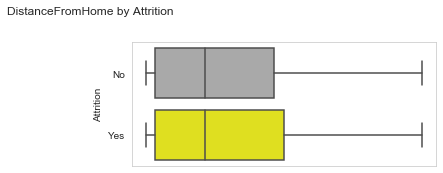

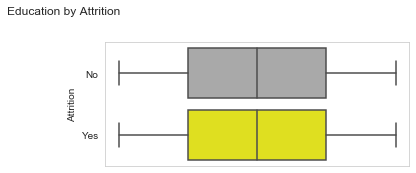

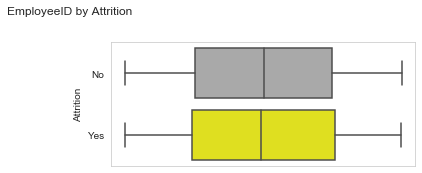

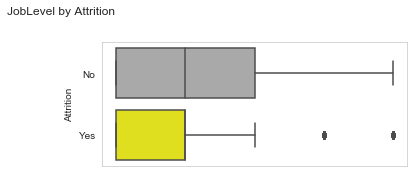

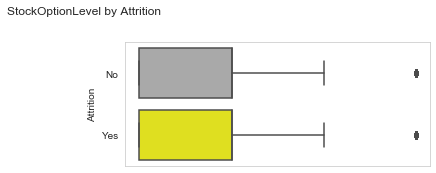

In [207]:
for n in ns:
    print(n)
    display_cxn_analysis(data, target, n, "Yes")

Age


,z-test statistic,p-value
Attrition,10.71,0.0


Attrition == No Mean: 37.56 (+/- 8.89)
Attrition == Yes Mean : 33.61 (+/- 33.61)
Absolute Mean Diferrence Distance: 3.95
MonthlyIncome


,z-test statistic,p-value
Attrition,2.07,0.04


Attrition == No Mean: 65672.60 (+/- 47472.81)
Attrition == Yes Mean : 61682.62 (+/- 61682.62)
Absolute Mean Diferrence Distance: 3989.98
PercentSalaryHike


,z-test statistic,p-value
Attrition,-2.16,0.03


Attrition == No Mean: 15.16 (+/- 3.63)
Attrition == Yes Mean : 15.48 (+/- 15.48)
Absolute Mean Diferrence Distance: 0.32
TrainingTimesLastYear


,z-test statistic,p-value
Attrition,3.29,0.0


Attrition == No Mean: 2.83 (+/- 1.31)
Attrition == Yes Mean : 2.65 (+/- 2.65)
Absolute Mean Diferrence Distance: 0.17
YearsAtCompany


,z-test statistic,p-value
Attrition,9.0,0.0


Attrition == No Mean: 7.37 (+/- 6.09)
Attrition == Yes Mean : 5.13 (+/- 5.13)
Absolute Mean Diferrence Distance: 2.24
YearsSinceLastPromotion


,z-test statistic,p-value
Attrition,2.19,0.03


Attrition == No Mean: 2.23 (+/- 3.23)
Attrition == Yes Mean : 1.95 (+/- 1.95)
Absolute Mean Diferrence Distance: 0.29
YearsWithCurrManager


,z-test statistic,p-value
Attrition,10.5,0.0


Attrition == No Mean: 4.37 (+/- 3.59)
Attrition == Yes Mean : 2.85 (+/- 2.85)
Absolute Mean Diferrence Distance: 1.52


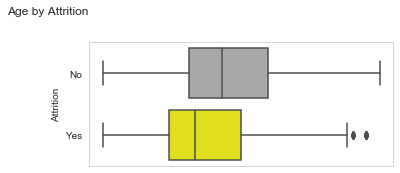

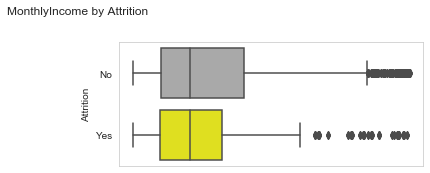

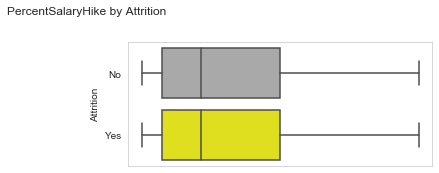

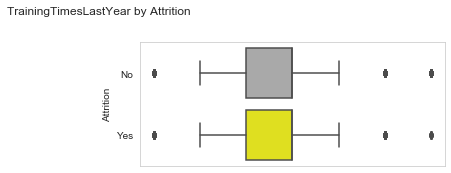

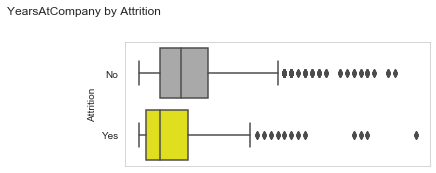

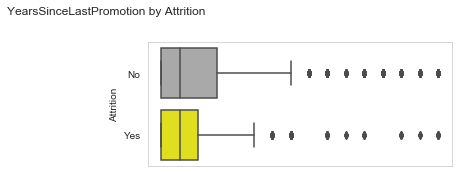

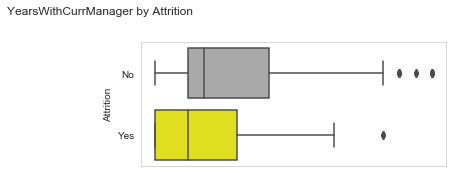

In [208]:
for n in significant:
    print(n)
    display_cxn_analysis(data, target, n, "Yes")

- The stronger indicators of people leaving include:
    - **Monthly Income**: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
    - **Over Time**: people who work overtime are more likelty to leave the company. Hence efforts  must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
    - **YearsWithCurrManager**: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager: 
    - **Age**: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
    - **DistanceFromHome**: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
    - **TotalWorkingYears**: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.
    - **YearsAtCompany**: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.